#Exploring Review Data
- let's look at some typical reviews, how many files there are, what the distributions of review lengths and hours played are, etc.

In [3]:
# Pretty much, this is my standard header because I use these following
# two libraries all the time
import sys
import os

In [4]:
# So, let's take a look at how many lines are in our reviews files
# Note: I just started processing GTAV after ending all the other processes
os.chdir('/home/mulhollandm2/reviews_project/reviewer_experience_prediction')
! wc -l data/*.txt

   30910 data/Arma_3.txt
   66500 data/Counter_Strike_Global_Offensive.txt
   17712 data/Counter_Strike.txt
   61900 data/Dota_2.txt
    2346 data/Football_Manager_2015.txt
   65860 data/Garrys_Mod.txt
   19880 data/Grand_Theft_Auto_V.txt
   67076 data/Sid_Meiers_Civilization_5.txt
   63840 data/Team_Fortress_2.txt
   65578 data/The_Elder_Scrolls_V.txt
   49270 data/Warframe.txt
  510872 total


In [6]:
# This is a stripped-down version of the function in read_data_files.py
# Note: I decided to get rid of the language identification rule for the time
# being because I don't want this function to take too long or else it will be
# useless in this context. We will still use the rule, just not in this
# notebook setting.
def get_reviews_for_game(file_name):
    '''
    Get list of reviews in a single game file.

    :param file_name: name of file
    :type file_name: str
    :returns: list of dicts
    '''

    reviews = []
    lines = open(file_name).readlines()
    i = 0
    while i + 1 < len(lines): # We need to get every 2-line couplet
        # Extract the hours value and the review text from each 2-line
        # sequence
        try:
            h = float(lines[i].split()[1].strip())
            r = lines[i + 1].split(' ', 1)[1].strip()
        except (ValueError, IndexError) as e:
            i += 2
            continue
        reviews.append(dict(hours=h,
                            review=r))
        i += 2 # Increment i by 2 since we need to go to the next
            # 2-line couplet
    return reviews

# Arma 3 Stats

In [7]:
# So, let's first get all of the reviews for the game with the smallest amount of
# review data, i.e., Football Manager 2015 (not including GTAV)
reviews = get_reviews_for_game('data/Arma_3.txt')

In [8]:
# First of all, how many reviews are there?
print('number of reviews: {}'.format(len(reviews)))

number of reviews: 15455


In [15]:
# Here's a couple reviews from the beginning of the file
reviews[:3]

NameError: name 'reviews' is not defined

#Arma 3: Review Length Distribution

In [16]:
# Let's measure the lengths of each review using a "list comprehension"
lengths = [len(review['review']) for review in reviews]
# Let's print out the first 10 lengths, just to see what we're working with
lengths[:10]

NameError: name 'reviews' is not defined

In [17]:
# Compute the average length value
avg_len = sum(lengths)/len(lengths)
print('average length: {}'.format(avg_len))

NameError: name 'lengths' is not defined

In [18]:
min_len = min(lengths)
print('minimum review length = {}'.format(min_len))

NameError: name 'lengths' is not defined

In [10]:
max_len = max(lengths)
print('maximum review length = {}'.format(max_len))

maximum review length = 5818


In [11]:
# Let's try to make a list of rounded length values where we round to the nearest
# 300 (I know, that's a pretty strange kind of thing to do)
from math import ceil
# We can do this by diving each length by 300, then rounding up, then multiplyig by 300
rounded_lengths = [ceil(l/300)*300 for l in lengths]
print('original lengths (first 10):          {}\nrounded lengths (to the nearest 300): {}'.format(
    lengths[:10],
    rounded_lengths[:10]))

original lengths (first 10):          [1669, 4072, 1126, 3370, 60, 1283, 954, 1127, 65, 1309]
rounded lengths (to the nearest 300): [1800, 4200, 1200, 3600, 300, 1500, 1200, 1200, 300, 1500]


In [12]:
# Now, let's make a frequency distribution with the collections.Counter module
from collections import Counter
rounded_length_fdist = Counter(rounded_lengths)
rounded_length_fdist

Counter({300: 799, 600: 161, 900: 86, 1200: 39, 1800: 27, 1500: 22, 2100: 10, 2400: 7, 3600: 5, 3000: 4, 3300: 3, 2700: 2, 4200: 2, 4500: 2, 3900: 2, 6000: 1, 5400: 1})

In [13]:
# It is obvious from looking at the freq. dist. above that length drops off a cliff
# after about 1000 characters
# In fact, for length up to 900, almost 1,050 reviews are accounted for, which means
# that only a little over 100 reviews are thinly-distributed over the remaining area
# above 1,000 characters

In [14]:
# Let's try to print out the freq dist in a nice way
# Bear with me as I attempt to use pandas, which is a very nice Python library
import pandas as pd

In [15]:
# Usually, when you use Pandas, you're using a dataframe, but a dataframe, as I understand
# it, it just made up on a set of "Series"
# Let's make a Series from our rounded lengths and then call its value_counts() method to
# get exactly what collections.Counter was doing (but we'll be able to use it to make a
# nice plot)
rounded_length_series = pd.Series(rounded_lengths)
rounded_length_series.value_counts()

300     799
600     161
900      86
1200     39
1800     27
1500     22
2100     10
2400      7
3600      5
3000      4
3300      3
2700      2
3900      2
4500      2
4200      2
5400      1
6000      1
dtype: int64

In [22]:
from data import FILTER_DICT
FILTER_DICT['Football_Manager_2015']['MAXLEN']

1200

(array([ 960.,  125.,   49.,   17.,    6.,    8.,    4.,    2.,    1.,    1.]),
 array([  300.,   870.,  1440.,  2010.,  2580.,  3150.,  3720.,  4290.,
         4860.,  5430.,  6000.]),
 <a list of 10 Patch objects>)

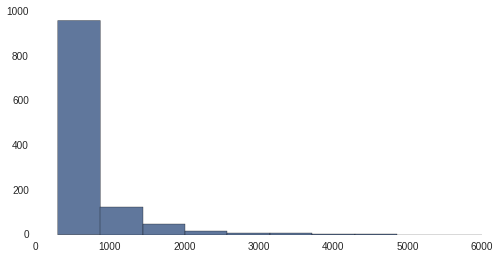

In [19]:
# The table above is nice, but let's do better and try to get a histogram
# Don't worry about all this importing stuff, it's just from something I read in a blog
# post
# Actually, go and check out the blog post here:
# http://nbviewer.ipython.org/github/mwaskom/seaborn/blob/master/examples/plotting_distributions.ipynb
# It's in, you guessed it, an IPython notebook! Shows what you can do with
# matplotlib.
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
plt.hist(rounded_length_series)

In [22]:
# That is one nice-looking histogram!
# From it, we can really see just how few reviews there are past 1,000
# For this item, we could probably set the cap at 1,200, let's say
# What do you think?

#Arma 3: Hours Distribution

In [23]:
# Let's do a similar kind of thing for the hours values
hours = [review['hours'] for review in reviews]
hours[:10]

[237.9, 113.0, 1138.7, 194.2, 372.3, 79.7, 1218.2, 386.4, 236.2, 526.4]

In [24]:
print("min: {}\nmax: {}".format(min(hours), max(hours)))

min: 0.2
max: 2482.1


In [25]:
rounded_hours = [ceil(h/300)*300 for h in hours]

In [26]:
rounded_hours[:10]

[300, 300, 1200, 300, 600, 300, 1500, 600, 300, 600]

In [27]:
# Let's use pandas again instead of collections.Counter
rounded_hours_series = pd.Series(rounded_hours)
rounded_hours_series.value_counts()

300     799
600     242
900      75
1200     28
1500     11
1800      8
2100      7
2700      2
2400      1
dtype: int64

In [28]:
# Hmm, well, would you look at that! The distribution looks exactly the same
# as that for length!

(array([ 799.,  242.,   75.,   28.,    0.,   11.,    8.,    7.,    1.,    2.]),
 array([  300.,   540.,   780.,  1020.,  1260.,  1500.,  1740.,  1980.,
         2220.,  2460.,  2700.]),
 <a list of 10 Patch objects>)

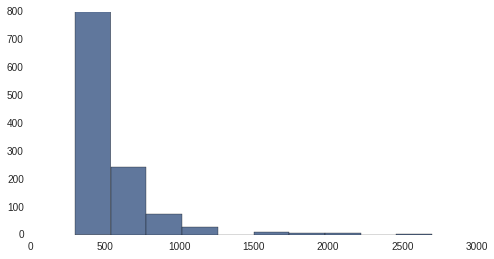

In [28]:
# Let's plot it!
plt.hist(rounded_hours_series)

In [30]:
# Yet again, it seems that simply throwing out reviews over 1000 will basically
# result in letting go of very few reviews (and dealing effectively with our
# outlier issue), so (at least for this game), it seems like a good idea to
# set the cap at 1000 hours

In [31]:
# Now that we know that, for Football_Manager_2015.txt, reviews that are under
# 1200 characters in length represent the bulk of the reviews (and that reviews
# that are over that can be thrown out), let's update the FILTER_DICT in
# data/__init__.py. This dictionary will contain keys for each game file and
# those keys themselves will map to dictionaries that contain keys for
# MAXLEN, MAXHOURS, MINLEN, MINHOURS.
# We also know that we want to throw out reviews whose hours played value is
# greater than 1000 (for this particular game), so we can also set that key.
# As for MINLEN and MINHOURS, let's just use 50 and 0, respectively, for now.
# If we find that other values should be used for any given game, we can change
# the values.
# Note that I have already updated the FILTER_DICT for the 'Football_Manager_2015'
# game to show you how it would look. As you figure out the values for the other
# games, updated FILTER_DICT accordingly.

In [29]:
# Playing around with this library called plotly
# Let's try to make a histogram in a slightly different kind of way
import plotly
import plotly.tools as tls
import plotly.plotly as py
from plotly.graph_objs import *
rounded_lengths_data = Data([
                             Histogram(
                                       x=rounded_lengths
                                       )
                             ])

In [30]:
plot_url = py.plot(rounded_lengths_data, filename='basic-histogram')

In [78]:
# Hmm, seems kind of interesting, there's a lot of stuff you can do with
# visualizing the data
# Here's the plot url, but I don't know if anybody but me will be able to see it,
# so, I'm going to try to put the graph directly in the IPython notebook.
plot_url

'https://plot.ly/~mulhod/4'

In [77]:
py.iplot(rounded_lengths_data, filename='basic-histogram')

In [79]:
# It's nice how interactive the graphs from plotly are! Hover around on
# the graph. Also, look at the lower right and right-click the "Play
# with this data! >>" button

In [80]:
# Anyway, this was just an aside. You don't need to do the plotly stuff
# for every game, though it actually does look nicer. Use either plotly or
# matplotlib

#Grand Theft Auto V Stats

In [32]:
reviews = get_reviews_for_game('data/Grand_Theft_Auto_V.txt')
reviews[:3]

[{'hours': 27.8,
  'review': "Game of the year simulator. If you're thinking about buying a game and you don't have GTA5 you basically need this game. BEWARE you need a pretty fast computer to keep up, the game is cheap in comparison to what you might need to spend to get it running but I can play it on a Radeon HD 5870 1GB without much fuss so the fact that it can run on 2009 hardware is pretty impressive. No complaints in the optimization department. I must say, the PC options are fantastic. There is a LOT of tweaking to do, especially in regards to the controller and keyboard settings in addition to the expansive performance tweaks. My favorite part is having a keyboard and mouse and gamepad in front of me and when the game gets to an intense shooting part I can put down my controller and use the keyboard/mouse and start shooting without having to go to a settings menu and change anything. It just works. It's perfect. The gameplay itself needs no introduction. You can do pretty much

#Grand Theft Auto V: Review Length Distribution

In [34]:
lengths = [len(review['review']) for review in reviews]
lengths[:10]

[1129, 39, 68, 63, 85, 79, 357, 203, 2034, 15]

In [35]:
print("min: {}\nmax: {}".format(min(lengths), max(lengths)))

min: 1
max: 7958


In [37]:
rounded_lengths = [ceil(l/300)*300 for l in lengths]
rounded_lengths[:10]

[1200, 300, 300, 300, 300, 300, 600, 300, 2100, 300]

(array([  9.43500000e+03,   3.67000000e+02,   6.70000000e+01,
          3.60000000e+01,   9.00000000e+00,   1.10000000e+01,
          7.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          5.00000000e+00]),
 array([  300.,  1080.,  1860.,  2640.,  3420.,  4200.,  4980.,  5760.,
         6540.,  7320.,  8100.]),
 <a list of 10 Patch objects>)

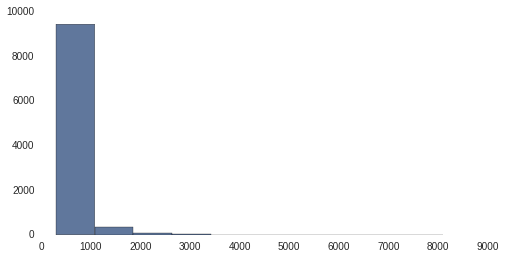

In [39]:
rounded_lengths_series = pd.Series(rounded_lengths)
plt.hist(rounded_lengths_series)

#Grand Theft Auto V: Review Hours Played Distribution

In [40]:
hours = [review['hours'] for review in reviews]
hours[:10]

[27.8, 48.8, 56.0, 59.7, 3.8, 22.5, 19.0, 66.6, 75.8, 61.4]

In [41]:
print("min: {}\nmax: {}".format(min(hours), max(hours)))

min: 0.1
max: 235.0


In [43]:
rounded_hours = [ceil(h/10)*10 for h in hours]
rounded_hours[:10]

[30, 50, 60, 60, 10, 30, 20, 70, 80, 70]

(array([  4.25200000e+03,   2.75000000e+03,   1.63700000e+03,
          9.80000000e+02,   1.96000000e+02,   8.20000000e+01,
          3.10000000e+01,   4.00000000e+00,   6.00000000e+00,
          2.00000000e+00]),
 array([  10.,   33.,   56.,   79.,  102.,  125.,  148.,  171.,  194.,
         217.,  240.]),
 <a list of 10 Patch objects>)

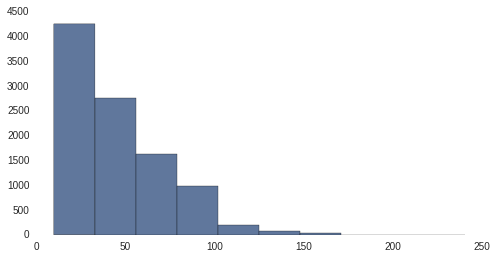

In [44]:
rounded_hours_series = pd.Series(rounded_hours)
plt.hist(rounded_hours_series)

In [45]:
len(reviews)

9940